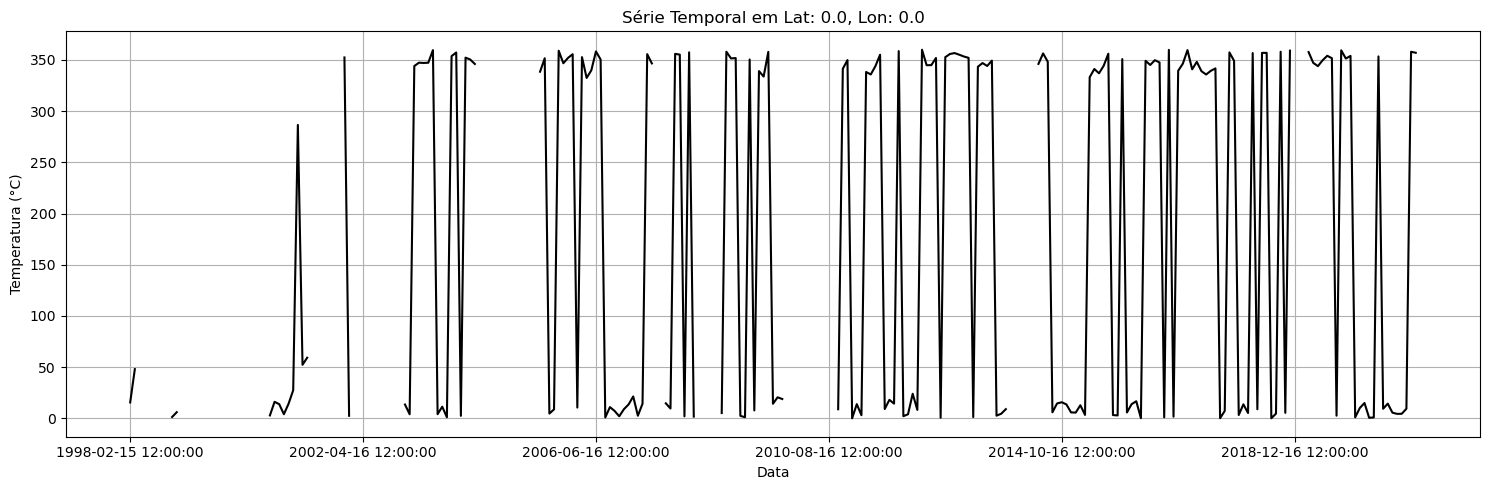

In [26]:
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import glob

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['WD_410'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()  # Remove eixos de tamanho 1

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)
    
    # Cria um DataFrame do pandas
    df = pd.DataFrame({
        'Data': datas,
        'Temperatura': temperatura
    })
    
    # Define a coluna de data como o índice do DataFrame
    df.set_index('Data', inplace=True)
    
    # Interpolação linear dos dados de temperatura
    #df['Temperatura_Interpolada'] = df['Temperatura'].interpolate(method='linear')
    
    return lat, lon, df

def plotar_serie_temporal(df, titulo):
    plt.figure(figsize=(15,5))

    # Utiliza os dados interpolados para plotar
    #df['Temperatura_interpolada'].plot(color='k', xlabel='Data', ylabel='Temperatura (°C)')
    df['Temperatura'].plot(color='k', xlabel='Data', ylabel='Temperatura (°C)')
 
    plt.title(titulo)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/0n0e.cdf"

arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    lat, lon, df = ler_dados(arquivo)
    titulo = f"Série Temporal em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(df, titulo)

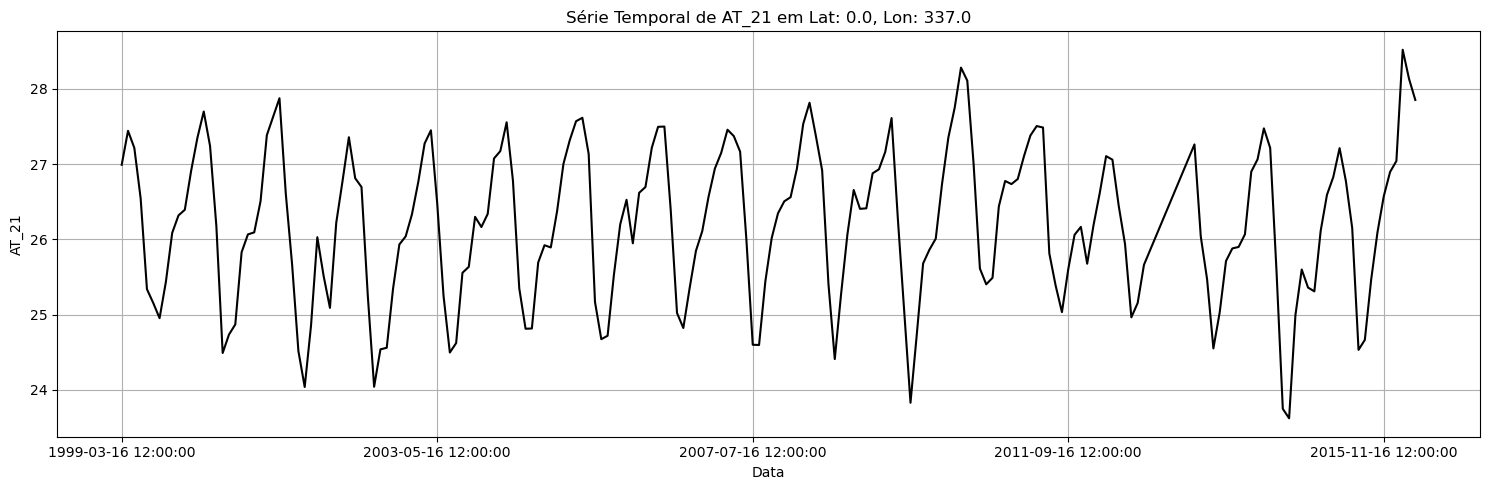

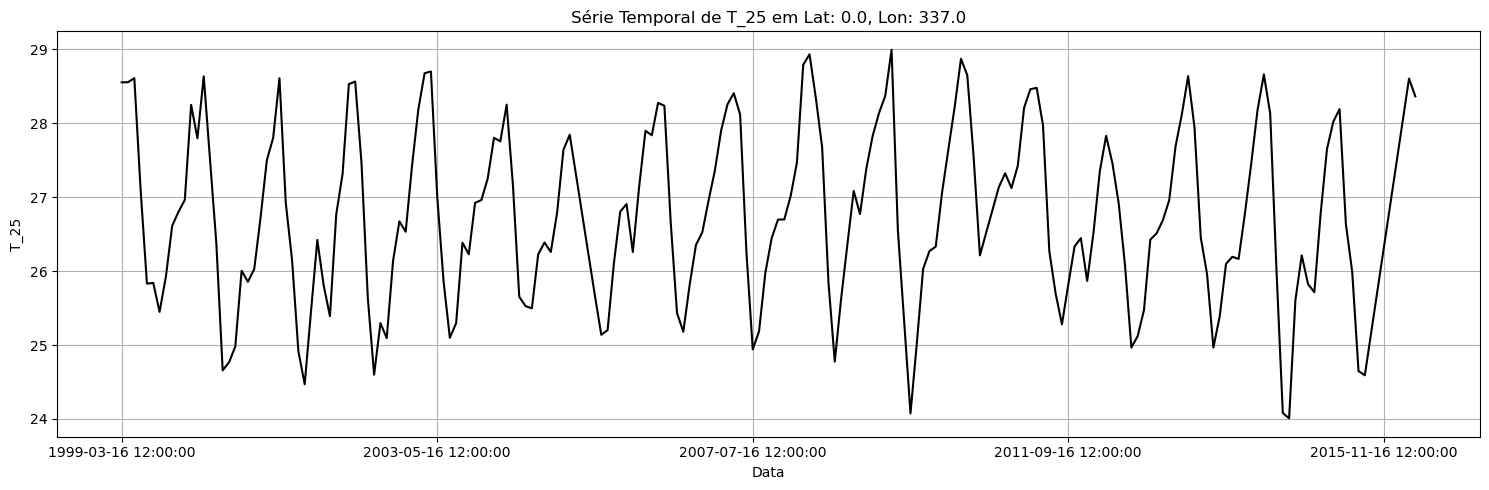

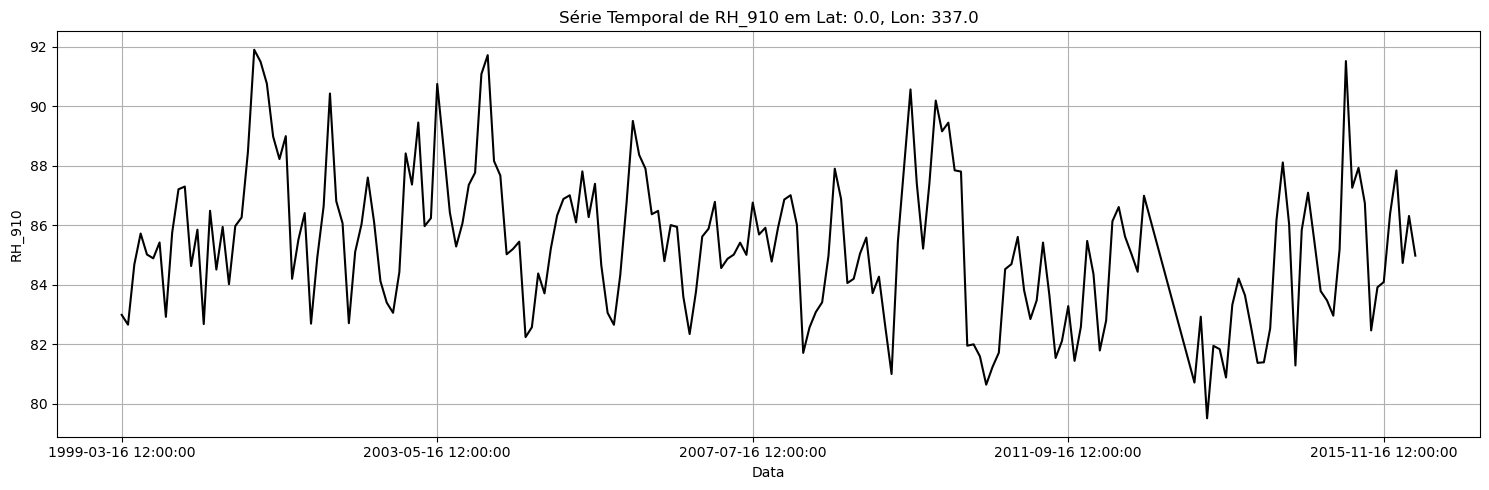

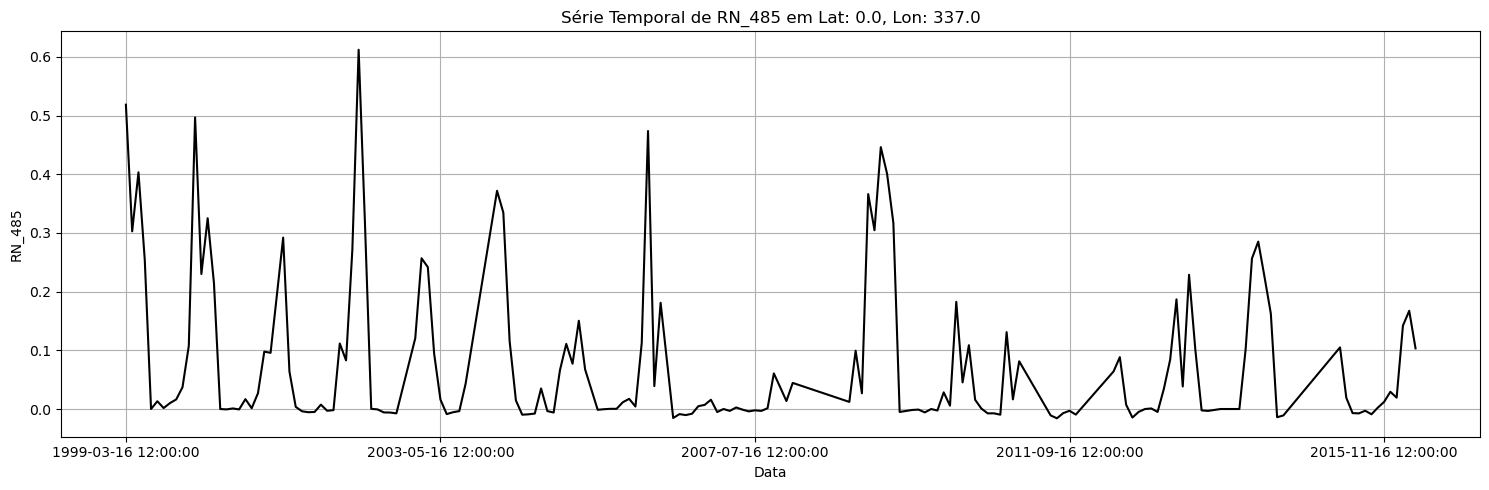

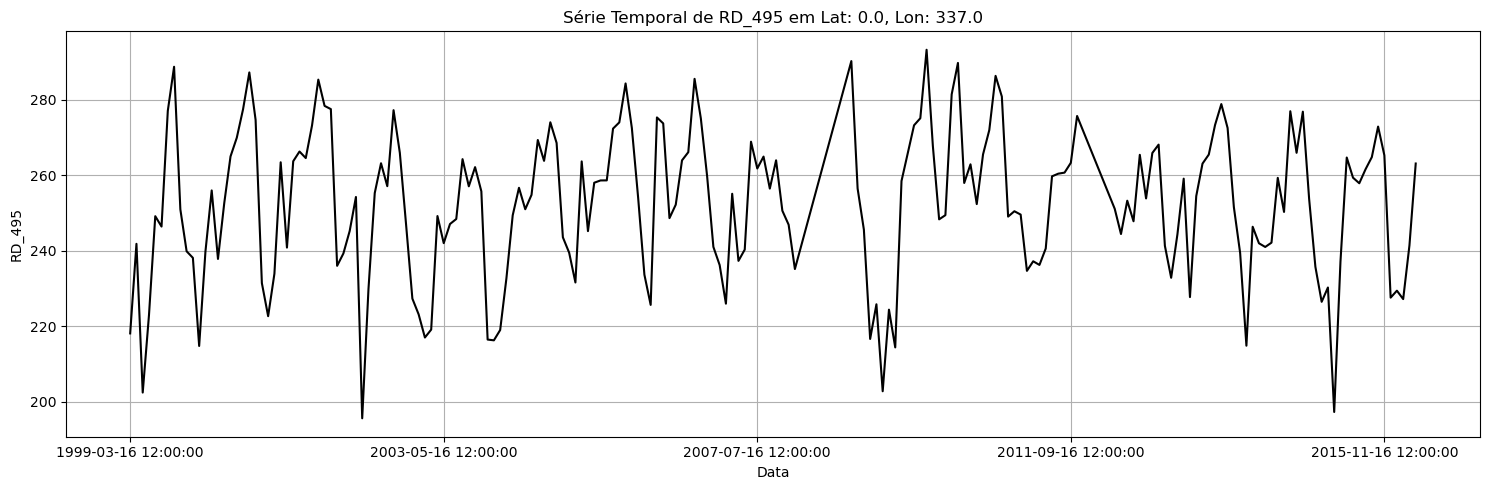

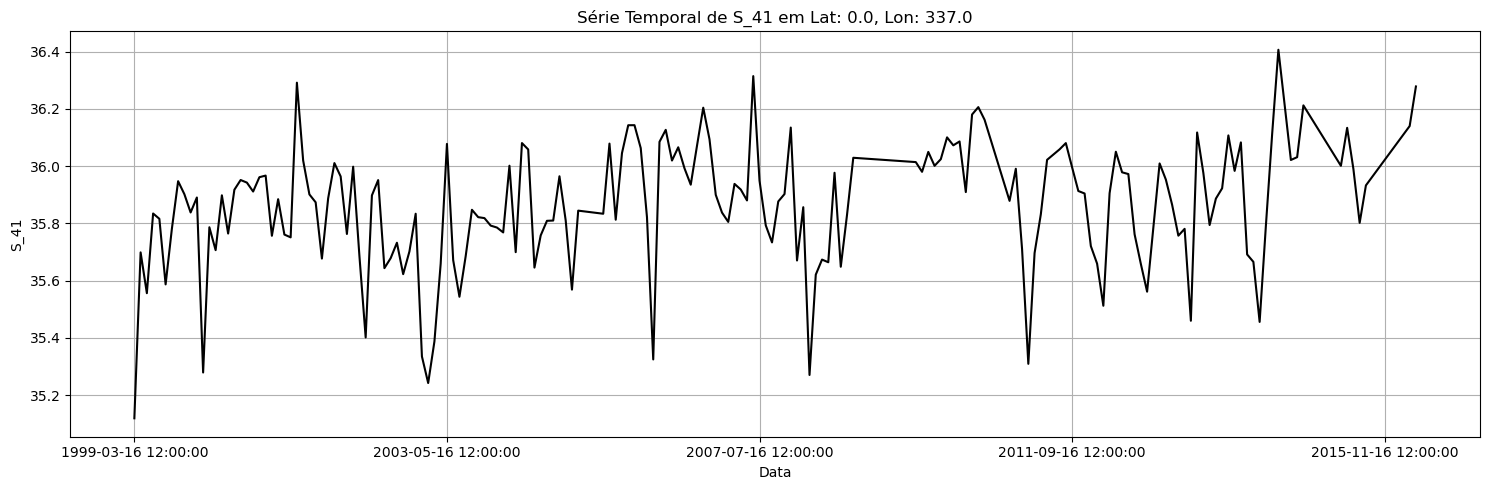

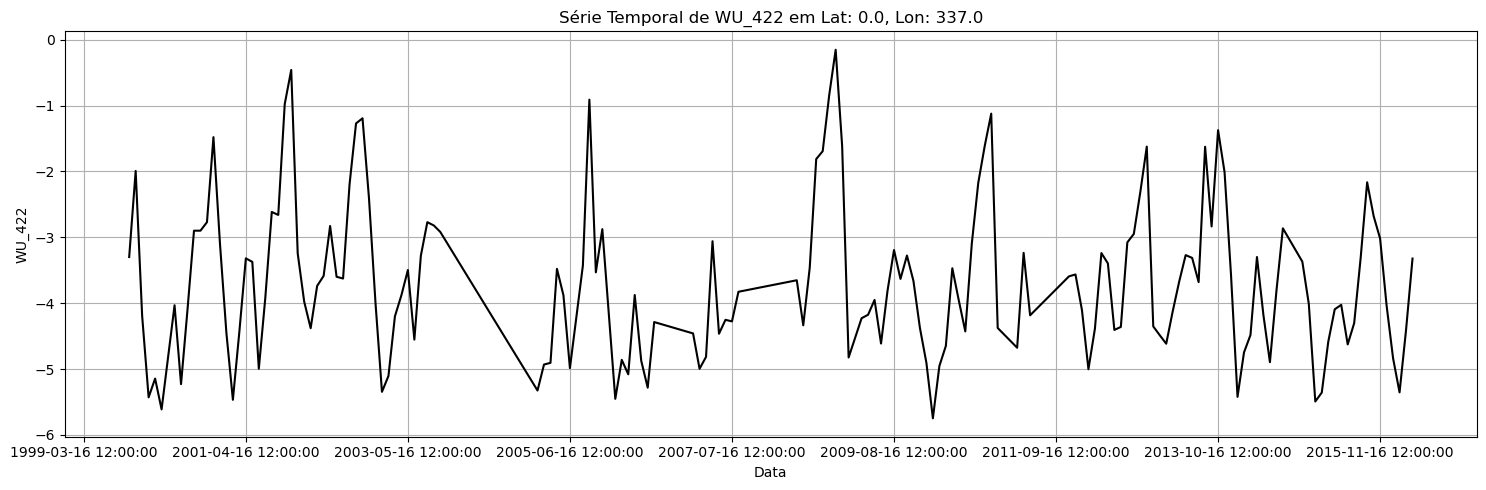

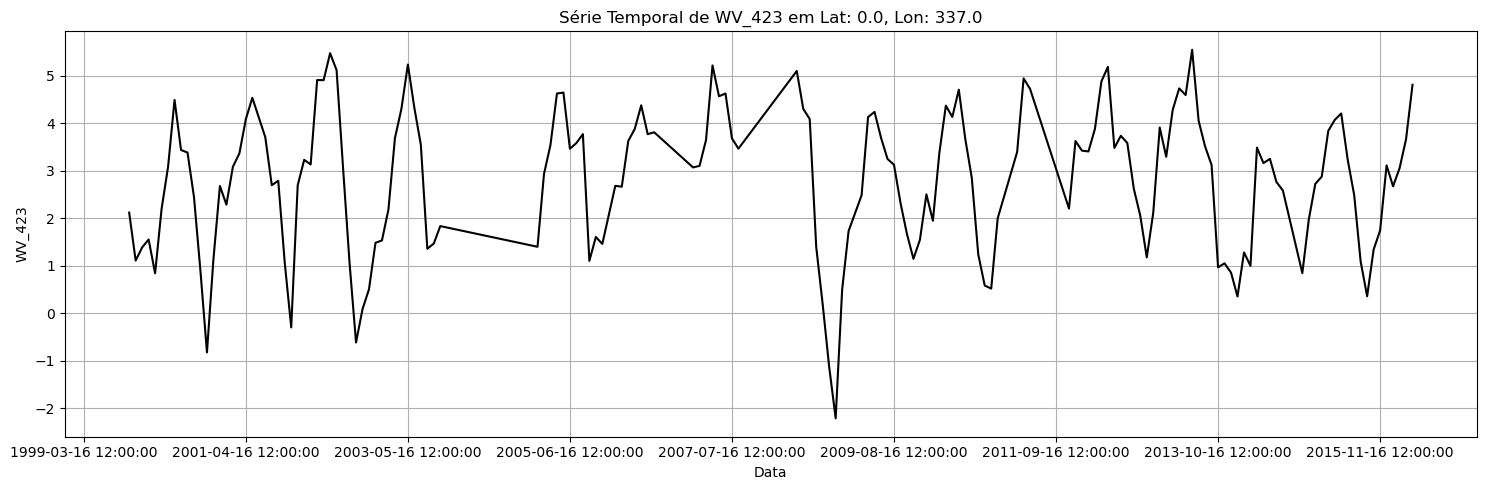

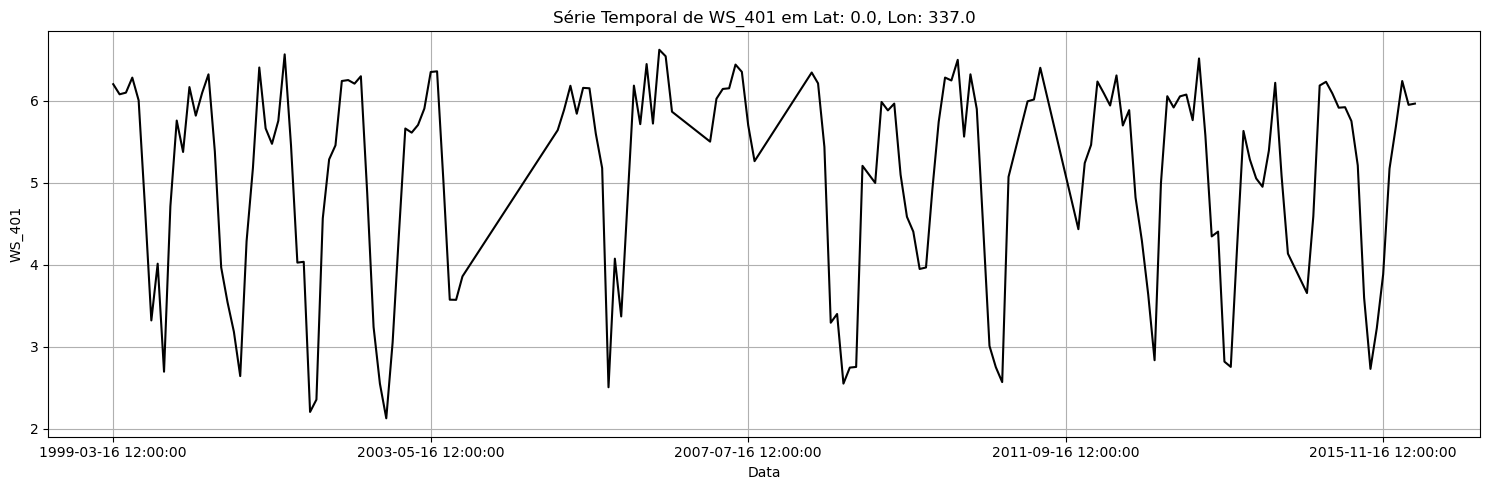

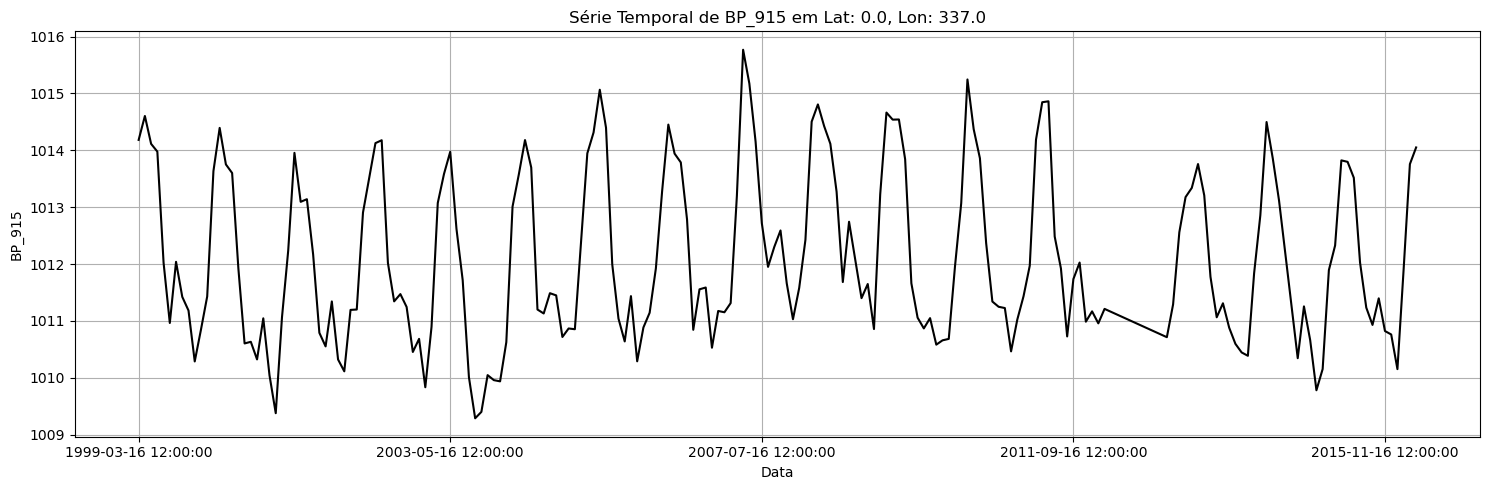

In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import glob

def ler_dados(arquivo, variaveis_interesse):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    fill_value = 1e35  # Valor usado para identificar dados ausentes

    dfs = {}
    for var in variaveis_interesse:
        if var in ds.variables:  # Checa se a variável está no arquivo
            dados = ds.variables[var][:]
            # Aplica o tratamento de fill_value para todas as variáveis exceto T_25
            if var != "T_25":
                dados = np.where(dados == fill_value, np.nan, dados)
            dados = dados.squeeze()  # Remove eixos de tamanho 1

            # Cria um DataFrame do pandas
            df = pd.DataFrame({
                'Data': datas,
                var: dados
            })

            # Define a coluna de data como o índice do DataFrame
            df.set_index('Data', inplace=True)
            
            # Interpolação linear dos dados para lidar com NaNs
            df[f'{var}_Interpolada'] = df[var].interpolate(method='linear')

            dfs[var] = df
    
    return lat.mean(), lon.mean(), dfs

def plotar_series_temporais(dfs, lat, lon):
    for var, df in dfs.items():
        plt.figure(figsize=(15,5))
        df[f'{var}_Interpolada'].plot(color='k', xlabel='Data', ylabel=var)
        #df.plot(color='k', xlabel='Data', ylabel=var)
        titulo = f"Série Temporal de {var} em Lat: {lat:.1f}, Lon: {lon:.1f}"
        plt.title(titulo)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/0n23w.cdf"

# Lista das variáveis de interesse
variaveis_interesse = ["AT_21", "T_25", "RH_910", "RN_485", "RD_495", "S_41", "WU_422", "WV_423", "WS_401","BP_915"]

arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    lat, lon, dfs = ler_dados(arquivo, variaveis_interesse)
    plotar_series_temporais(dfs, lat, lon)



<Figure size 1500x500 with 0 Axes>

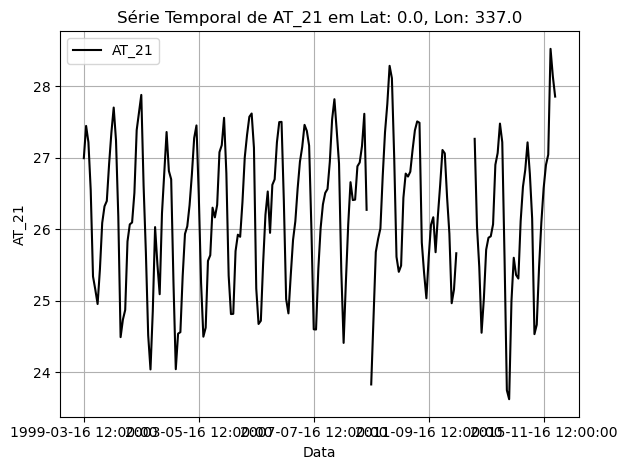

<Figure size 1500x500 with 0 Axes>

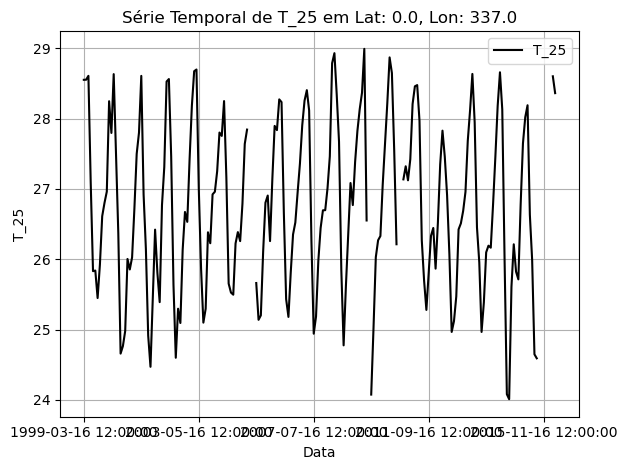

<Figure size 1500x500 with 0 Axes>

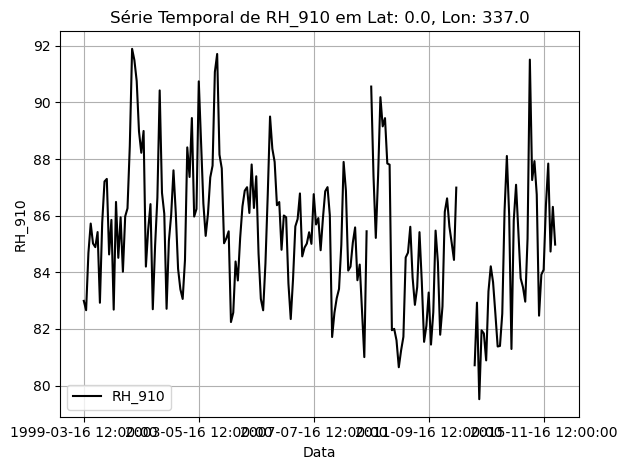

<Figure size 1500x500 with 0 Axes>

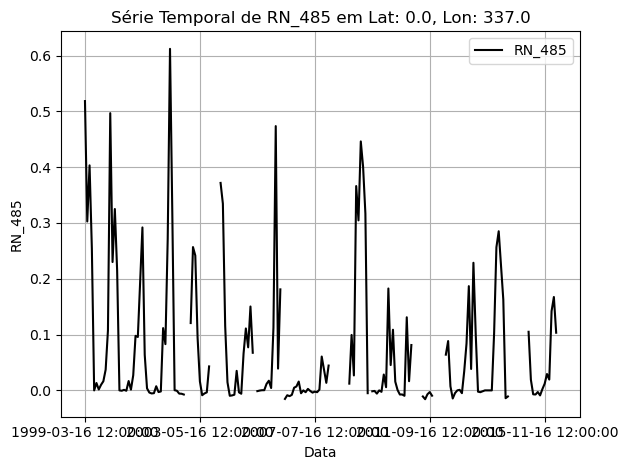

<Figure size 1500x500 with 0 Axes>

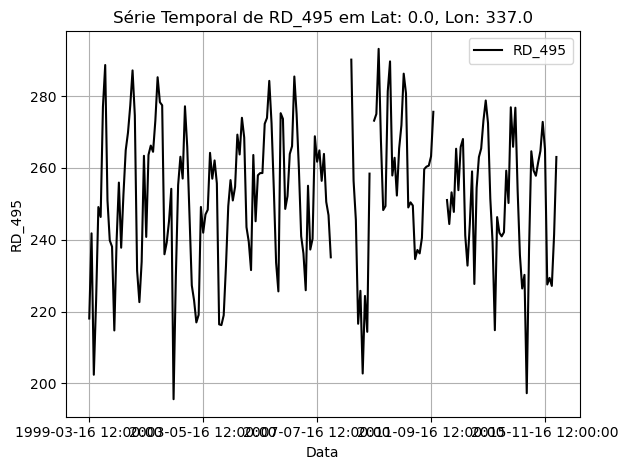

<Figure size 1500x500 with 0 Axes>

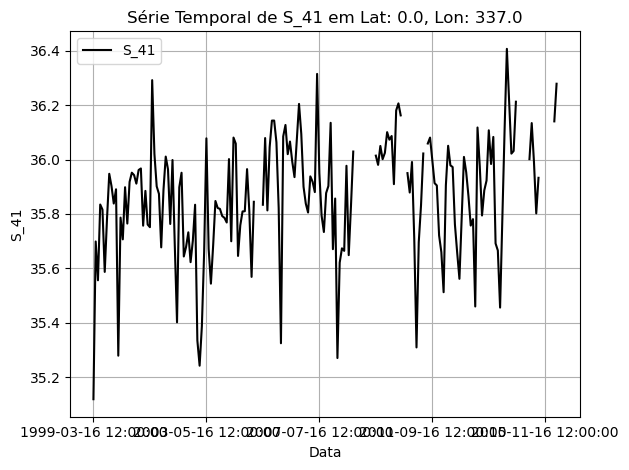

<Figure size 1500x500 with 0 Axes>

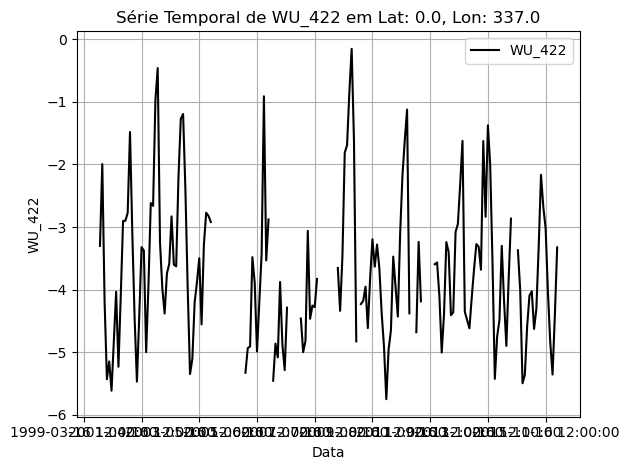

<Figure size 1500x500 with 0 Axes>

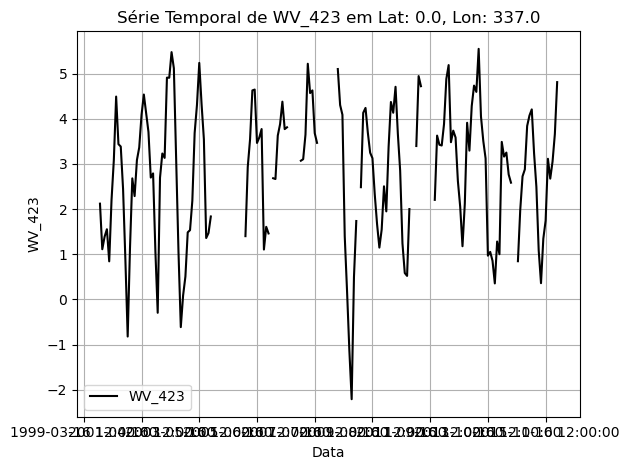

<Figure size 1500x500 with 0 Axes>

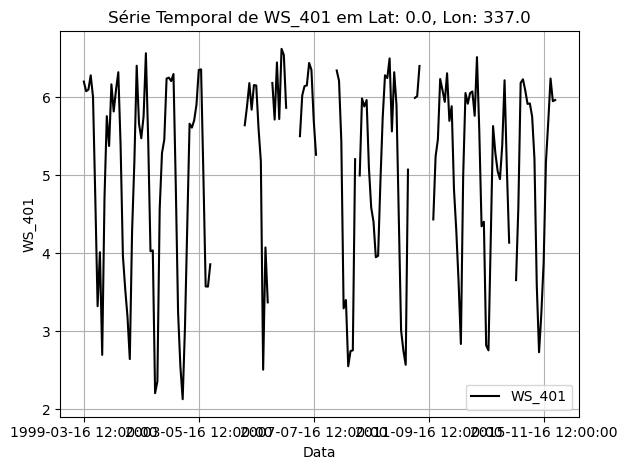

<Figure size 1500x500 with 0 Axes>

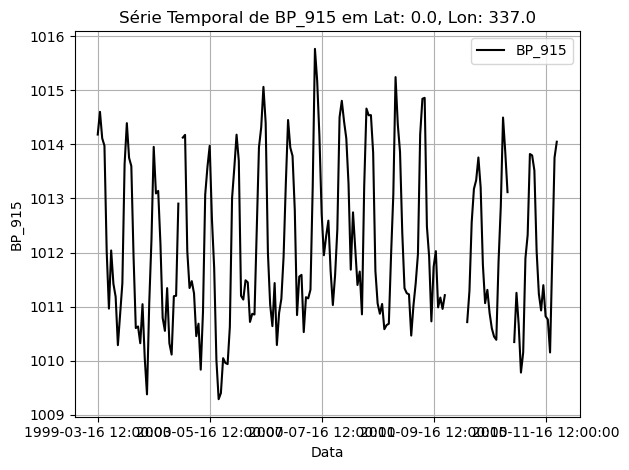

In [81]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import glob

def ler_dados(arquivo, variaveis_interesse):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    fill_value = 1e35  # Valor usado para identificar dados ausentes

    dfs = {}
    for var in variaveis_interesse:
        if var in ds.variables:  # Checa se a variável está no arquivo
            dados = ds.variables[var][:]
            # Aplica o tratamento de fill_value para todas as variáveis exceto T_25
            if var != "T_25":
                dados = np.where(dados == fill_value, np.nan, dados)
            dados = dados.squeeze()  # Remove eixos de tamanho 1

            # Cria um DataFrame do pandas
            df = pd.DataFrame({
                'Data': datas,
                var: dados
            })

            # Define a coluna de data como o índice do DataFrame
            df.set_index('Data', inplace=True)
            
            # Interpolação linear dos dados para lidar com NaNs
            #df[f'{var}_Interpolada'] = df[var].interpolate(method='linear')

            dfs[var] = df
    
    return lat.mean(), lon.mean(), dfs

def plotar_series_temporais(dfs, lat, lon):
    for var, df in dfs.items():
        plt.figure(figsize=(15,5))
        df.plot(color='k', xlabel='Data', ylabel=var)
        #df.plot(color='k', xlabel='Data', ylabel=var)
        titulo = f"Série Temporal de {var} em Lat: {lat:.1f}, Lon: {lon:.1f}"
        plt.title(titulo)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/0n23w.cdf"

# Lista das variáveis de interesse
variaveis_interesse = ["AT_21", "T_25", "RH_910", "RN_485", "RD_495", "S_41", "WU_422", "WV_423", "WS_401","BP_915"]

arquivos_netCDF = glob.glob(caminho_pasta)

for arquivo in arquivos_netCDF:
    lat, lon, dfs = ler_dados(arquivo, variaveis_interesse)
    plotar_series_temporais(dfs, lat, lon)

# Cálculo da magnitude do vento

In [82]:
import glob
import netCDF4 as nc
import numpy as np

def processar_e_salvar_arquivo(arquivo_entrada):
    # Abre o arquivo NetCDF original
    ds = nc.Dataset(arquivo_entrada, 'r')
    
    # Leitura das variáveis de vento
    wu = ds.variables['WU_422'][:]  # Verificar o nome correto da variável
    wv = ds.variables['WV_423'][:]  # Verificar o nome correto da variável
    
    # Calcula a magnitude do vento
    mag_vento = np.sqrt(wu**2 + wv**2)
    
    # Nome do novo arquivo NetCDF
    novo_arquivo = arquivo_entrada.replace('.cdf', '_modificado.cdf')
    
    # Criar um novo arquivo NetCDF para armazenar os resultados
    novo_ds = nc.Dataset(novo_arquivo, 'w', format='NETCDF4')
    
    # Copiar dimensões
    for nome, dimensao in ds.dimensions.items():
        novo_ds.createDimension(nome, len(dimensao) if not dimensao.isunlimited() else None)
    
    # Copiar variáveis exceto WU_422 e wV_423
    for nome, variavel in ds.variables.items():
        if nome not in ['WU_422', 'WV_423']:
            nova_var = novo_ds.createVariable(nome, variavel.datatype, variavel.dimensions)
            nova_var.setncatts({k: variavel.getncattr(k) for k in variavel.ncattrs()})
            nova_var[:] = variavel[:]
    
    # Adicionar a nova variável 'mag_vento'
    mag_var = novo_ds.createVariable('mag_vento', 'f4', ('time', 'lat', 'lon'))  # Ajustar dimensões conforme necessário
    mag_var.units = 'm/s'  # Definir unidade apropriada
    mag_var.long_name = 'magnitude do vento'
    mag_var[:] = mag_vento
    
    # Fechar os datasets
    ds.close()
    novo_ds.close()
    
    return novo_arquivo

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/0n23w.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

# Processar cada arquivo e salvar o novo arquivo com a magnitude do vento
arquivos_processados = [processar_e_salvar_arquivo(arquivo) for arquivo in arquivos_netCDF]


/home/leticia/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:6957: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


## Criando arquivo .csv

In [2]:
import numpy as np
import netCDF4 as nc
import pandas as pd

def ler_dados_e_exportar_csv(arquivo, variaveis_interesse, arquivo_saida):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    fill_value = 1e35  # Valor usado para identificar dados ausentes

    # DataFrame final que irá conter todas as variáveis
    df_final = pd.DataFrame({
        'Data': datas
    })
    df_final.set_index('Data', inplace=True)

    for var in variaveis_interesse:
        if var in ds.variables:  # Checa se a variável está no arquivo
            dados = ds.variables[var][:]
            # Aplica o tratamento de fill_value para todas as variáveis exceto T_25 e mag_vento
            if var != "T_25" and var != "mag_vento":
                dados = np.where(dados == fill_value, np.nan, dados)
            dados = dados.squeeze()  # Remove eixos de tamanho 1

            # Cria um DataFrame temporário para a variável atual
            df_temp = pd.DataFrame({
                var: dados
            }, index=df_final.index)

            # Interpolação linear dos dados para lidar com NaNs
            #df_temp[var] = df_temp[var].interpolate(method='linear')

            # Concatena com o DataFrame final
            df_final = pd.concat([df_final, df_temp], axis=1)
    
    # Exporta para CSV, arredondando os números flutuantes para duas casas decimais
        df_final.to_csv(arquivo_saida, float_format='%.2f')


    return lat.mean(), lon.mean(), df_final

# Lista das variáveis de interesse
variaveis_interesse = ["AT_21", "T_25", "RH_910", "RN_485", "RD_495", "S_41", "mag_vento", "WS_401","BP_915"]

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/0n23w_modificado.cdf"
arquivo_saida = "dados_boias_0n23w_interp.csv"  # Defina o caminho desejado para o arquivo CSV

# Processa o arquivo NetCDF e exporta os dados para um CSV
lat, lon, df_final = ler_dados_e_exportar_csv(caminho_pasta, variaveis_interesse, arquivo_saida)

print(f"Arquivo CSV criado: {arquivo_saida}")


Arquivo CSV criado: dados_boias_0n23w_interp.csv


In [3]:
da = pd.read_csv("/home/leticia/Documentos/MESTRADO/quali/Dados/dados_boias_unidos/dados_boias_0n23w_interp.csv")
da

,Data,AT_21,T_25,RH_910,RN_485,RD_495,S_41,mag_vento,WS_401,BP_915
0,1999-03-16 12:00:00,26.99,28.55,82.99,0.52,218.05,35.12,NaN,6.20,1014.18
1,1999-04-16 12:00:00,27.44,28.55,82.66,0.30,241.78,35.70,NaN,6.08,1014.60
2,1999-05-16 12:00:00,27.22,28.61,84.68,0.40,202.38,35.56,NaN,6.10,1014.11
3,1999-06-16 12:00:00,26.55,27.09,85.72,0.25,222.94,35.83,NaN,6.28,1013.98
4,1999-07-16 12:00:00,25.34,25.83,85.02,0.00,249.11,35.82,NaN,6.00,1012.02
...,...,...,...,...,...,...,...,...,...,...
201,2015-12-16 12:00:00,26.90,NaN,86.38,0.03,227.53,NaN,5.10,5.17,1010.76
202,2016-01-16 12:00:00,27.04,NaN,87.84,0.02,229.37,NaN,5.53,5.68,1010.15
203,2016-02-15 12:00:00,28.52,NaN,84.73,0.14,227.14,NaN,6.16,6.24,1011.92
204,2016-03-16 12:00:00,28.14,28.60,86.31,0.17,241.38,36.14,5.73,5.95,1013.76
